In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Read in the CSV file and create the Pandas DataFrame
df_project4 = pd.read_csv(
    "Starter_Data.csv"
)
# Review the DataFrame
df_project4.head()

,date,price_indextor,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,GDP_growth,CND_USD_exchange
0,2004-10-01,104.9,0.000,0.023,0.043,0.023,0.059,0.065,0.800
1,2004-11-01,105.2,0.003,0.024,0.043,0.018,0.059,0.065,0.835
2,2004-12-01,105.1,-0.001,0.021,0.043,0.024,0.059,0.065,0.824
3,2005-01-01,105.0,-0.001,0.019,0.043,-0.005,0.057,0.064,0.826
4,2005-02-01,105.6,0.006,0.021,0.043,0.050,0.057,0.064,0.806


In [3]:
# drop "price_indextor" column from dataframe 
df_project4.drop("price_indextor", axis=1, inplace=True)

In [4]:
# Review the DataFrame
df_project4.head()

,date,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,GDP_growth,CND_USD_exchange
0,2004-10-01,0.000,0.023,0.043,0.023,0.059,0.065,0.800
1,2004-11-01,0.003,0.024,0.043,0.018,0.059,0.065,0.835
2,2004-12-01,-0.001,0.021,0.043,0.024,0.059,0.065,0.824
3,2005-01-01,-0.001,0.019,0.043,-0.005,0.057,0.064,0.826
4,2005-02-01,0.006,0.021,0.043,0.050,0.057,0.064,0.806


In [5]:
# Remove white spaces
df_project4.columns = df_project4.columns.str.strip()
df_project4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 219 non-null    object 
 1   price_index_change   219 non-null    float64
 2   inflation_rate       219 non-null    float64
 3   canadian_prime_rate  219 non-null    float64
 4   cnd_tsx_indx         219 non-null    float64
 5   unemployment_rate    219 non-null    float64
 6   GDP_growth           219 non-null    float64
 7   CND_USD_exchange     219 non-null    float64
dtypes: float64(7), object(1)
memory usage: 13.8+ KB


In [6]:
column_to_scale = df_project4[["price_index_change","inflation_rate","canadian_prime_rate","cnd_tsx_indx","unemployment_rate","GDP_growth","CND_USD_exchange"]]

In [7]:
# import additional libraries
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:

# Applying Scaler
scaler = StandardScaler()
project4_scaled = scaler.fit_transform(column_to_scale)

In [9]:
# display scaled data
project4_scaled

array([[-0.44523807,  0.14959647,  0.65101898, ..., -0.05118592,
         0.4937341 , -0.60419126],
       [ 0.28974035,  0.21756664,  0.65101898, ..., -0.05118592,
         0.4937341 , -0.24375098],
       [-0.69023087,  0.01365611,  0.65101898, ..., -0.05118592,
         0.4937341 , -0.35703221],
       ...,
       [ 1.02471877,  3.27622468,  2.26792602, ..., -1.68593609,
         1.71201039, -1.19125581],
       [ 0.28974035,  3.20825451,  2.26792602, ..., -1.68593609,
         1.71201039, -1.32603988],
       [-1.18021649,  2.86840361,  2.74348691, ..., -1.68593609,
         1.71201039, -1.22595076]])

In [10]:
# Creating a DataFrame with with the scaled data
df_project4_transformed = pd.DataFrame(project4_scaled, columns=["price_index_change","inflation_rate","canadian_prime_rate","cnd_tsx_indx","unemployment_rate","GDP_growth","CND_USD_exchange"])
df_project4_transformed.head() 

,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,GDP_growth,CND_USD_exchange
0,-0.445238,0.149596,0.651019,0.481037,-0.051186,0.493734,-0.604191
1,0.289740,0.217567,0.651019,0.351586,-0.051186,0.493734,-0.243751
2,-0.690231,0.013656,0.651019,0.506927,-0.051186,0.493734,-0.357032
3,-0.690231,-0.122284,0.651019,-0.243888,-0.284722,0.470748,-0.336436
4,1.024719,0.013656,0.651019,1.180071,-0.284722,0.470748,-0.542402


In [11]:
# plot the data to see what it looks like
df_project4_transformed.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [12]:
# Define features set X by selecting all columns but GDP_growth
X = df_project4_transformed.drop(columns=["GDP_growth"]).copy()

# Display the features DataFrame
X

,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,CND_USD_exchange
0,-0.445238,0.149596,0.651019,0.481037,-0.051186,-0.604191
1,0.289740,0.217567,0.651019,0.351586,-0.051186,-0.243751
2,-0.690231,0.013656,0.651019,0.506927,-0.051186,-0.357032
3,-0.690231,-0.122284,0.651019,-0.243888,-0.284722,-0.336436
4,1.024719,0.013656,0.651019,1.180071,-0.284722,-0.542402
...,...,...,...,...,...,...
214,-1.425209,3.344195,1.031468,-0.580460,-1.685936,-1.273580
215,-0.200245,3.276225,1.792365,-1.305384,-1.685936,-1.170597
216,1.024719,3.276225,2.267926,1.257741,-1.685936,-1.191256
217,0.289740,3.208255,2.267926,1.257741,-1.685936,-1.326040


In [13]:
# Define target set by selecting the GDP_growth column
y = df_project4_transformed["GDP_growth"]

# Display a sample of y
y[:5]

0    0.493734
1    0.493734
2    0.493734
3    0.470748
4    0.470748
Name: GDP_growth, dtype: float64

In [14]:
# Split into training and testing windows
from sklearn.model_selection import train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

6

In [16]:
# Define the number of neurons in the output layer
number_output_neurons = 5

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1

3

In [17]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2

2

In [18]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3 = (hidden_nodes_layer2 + 1) // 2

# Review the number of hidden nodes in the second layer
hidden_nodes_layer3

1

In [19]:
# Create the Sequential model instance
nn = Sequential()

In [20]:
# First hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="relu"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 21        
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 34 (136.00 Byte)
Trainable params: 34 (136.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the Sequential model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [22]:
# Fit the model using 200 epochs and the training data
fit_model = nn.fit(X_train, y_train, validation_split=0.3, epochs=200)

Epoch 1/200


4/4 [==============================] - 1s 53ms/step - loss: 7.3912 - mse: 7.3912 - val_loss: 5.8563 - val_mse: 5.8563
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 7.0868 - mse: 7.0868 - val_loss: 5.6287 - val_mse: 5.6287
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 6.8197 - mse: 6.8197 - val_loss: 5.4117 - val_mse: 5.4117
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 6.5332 - mse: 6.5332 - val_loss: 5.2082 - val_mse: 5.2082
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 6.2772 - mse: 6.2772 - val_loss: 5.0132 - val_mse: 5.0132
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 6.0275 - mse: 6.0275 - val_loss: 4.8277 - val_mse: 4.8277
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 5.8023 - mse: 5.8023 - val_loss: 4.6499 - val_mse: 4.6499
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 5.5630 - mse: 5.56

In [23]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.6994 - mse: 0.6994 - 32ms/epoch - 16ms/step
Loss: 0.6994451880455017, Accuracy: 0.6994451880455017


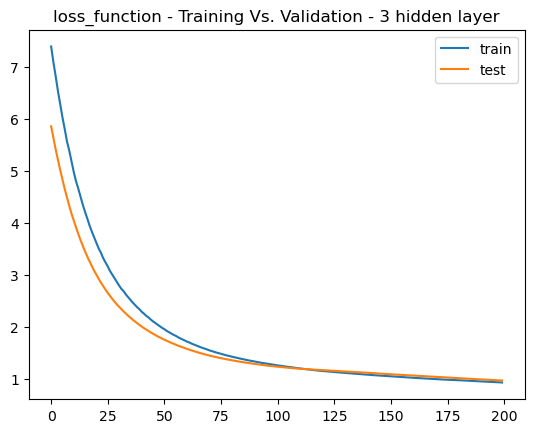

In [24]:
import matplotlib.pyplot as plt

# Train vs test for shallow net
plt.plot(fit_model.history["loss"])
plt.plot(fit_model.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 3 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [25]:
# create a second deeper model (more layers)
# Define the model - deep neural net
number_input_features = 6
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 4
hidden_nodes_layer4 = 2

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [26]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X_train, y_train, validation_split=0.3, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 71ms/step - loss: 1.0514 - mse: 1.0514 - val_loss: 1.0678 - val_mse: 1.0678
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 1.0426 - mse: 1.0426 - val_loss: 1.0638 - val_mse: 1.0638
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 1.0339 - mse: 1.0339 - val_loss: 1.0596 - val_mse: 1.0596
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0287 - mse: 1.0287 - val_loss: 1.0561 - val_mse: 1.0561
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0213 - mse: 1.0213 - val_loss: 1.0528 - val_mse: 1.0528
Epoch 6/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0157 - mse: 1.0157 - val_loss: 1.0497 - val_mse: 1.0497
Epoch 7/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0102 - mse: 1.0102 - val_loss: 1.0467 - val_mse: 1.0467
Epoch 8/200
4/4 [==============================] - 0s 15ms/step - loss: 1.0046 - mse: 1.00

In [27]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.3488 - mse: 0.3488 - 33ms/epoch - 16ms/step
Loss: 0.34877991676330566, Accuracy: 0.34877991676330566


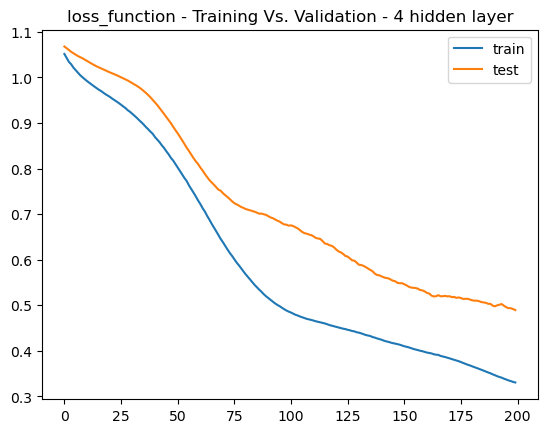

In [28]:
import matplotlib.pyplot as plt

# Train vs test for shallow net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 4 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [29]:
# import tensorflow to save the model
import tensorflow as tf

In [30]:
# Save model in JSON format
nn_json = nn.to_json()

# Define a relative path to save the model
# The model should be saved with a .json file extension
file_path = (r"C:\Users\juddm\JupyterLab-Workspace\Project 2\model1.json")

# Write the model to the the file 
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Define a relative path to save the model weights
# The model weights should be saved with a .h5 file extension
file_path = (r"C:\Users\juddm\JupyterLab-Workspace\Project 2\model1.h5")

nn.save_weights(file_path)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

In [32]:
# Load the model to predict values

# Identify the relative path of the model's location
file_path = Path(r"C:\Users\juddm\JupyterLab-Workspace\Project 2\model1.json")

# Read in the model and save it as the variable loaded_model
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Identify the relative path for the model's weights
file_path = Path(r"C:\Users\juddm\JupyterLab-Workspace\Project 2\model1.h5")

# Load the model's weights to the variable loaded_model
loaded_model.load_weights(file_path)

In [33]:
 # Predict values using the testing data
y_pred = loaded_model.predict(X_test)

# View the model's predictions
y_pred[:5, :]

2/2 [==============================] - 0s 0s/step


array([[0.70097923],
       [0.37464696],
       [0.45254242],
       [0.67046297],
       [0.31648567]], dtype=float32)

In [34]:
# Import
from sklearn.metrics import mean_squared_error

# Evaluate the model with the MSE metric
print(mean_squared_error(y_test, y_pred))

0.34877990783503005


In [35]:
# Import
from sklearn.metrics import mean_absolute_error

# Evaluate the model with the MAE metric
print(mean_absolute_error(y_test, y_pred))

0.4157509803162372


In [73]:
# Model 3: Neural network

In [36]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
# Read in the CSV file and create the Pandas DataFrame
df_project5 = pd.read_csv(
    "Starter_Data.csv"
)
# Review the DataFrame
df_project5.head()

,date,price_indextor,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,GDP_growth,CND_USD_exchange
0,2004-10-01,104.9,0.000,0.023,0.043,0.023,0.059,0.065,0.800
1,2004-11-01,105.2,0.003,0.024,0.043,0.018,0.059,0.065,0.835
2,2004-12-01,105.1,-0.001,0.021,0.043,0.024,0.059,0.065,0.824
3,2005-01-01,105.0,-0.001,0.019,0.043,-0.005,0.057,0.064,0.826
4,2005-02-01,105.6,0.006,0.021,0.043,0.050,0.057,0.064,0.806


In [39]:
# drop "price_indextor" column from dataframe 
df_project5.drop("price_indextor", axis=1, inplace=True)

In [40]:
# Remove white spaces
df_project5.columns = df_project5.columns.str.strip()
df_project5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 219 non-null    object 
 1   price_index_change   219 non-null    float64
 2   inflation_rate       219 non-null    float64
 3   canadian_prime_rate  219 non-null    float64
 4   cnd_tsx_indx         219 non-null    float64
 5   unemployment_rate    219 non-null    float64
 6   GDP_growth           219 non-null    float64
 7   CND_USD_exchange     219 non-null    float64
dtypes: float64(7), object(1)
memory usage: 13.8+ KB


In [41]:
column_to_scale = df_project4[["price_index_change","inflation_rate","canadian_prime_rate","cnd_tsx_indx","unemployment_rate","GDP_growth","CND_USD_exchange"]]

In [42]:
# Applying Scaler
scaler = StandardScaler()
project5_scaled = scaler.fit_transform(column_to_scale)

In [43]:
project5_scaled

array([[-0.44523807,  0.14959647,  0.65101898, ..., -0.05118592,
         0.4937341 , -0.60419126],
       [ 0.28974035,  0.21756664,  0.65101898, ..., -0.05118592,
         0.4937341 , -0.24375098],
       [-0.69023087,  0.01365611,  0.65101898, ..., -0.05118592,
         0.4937341 , -0.35703221],
       ...,
       [ 1.02471877,  3.27622468,  2.26792602, ..., -1.68593609,
         1.71201039, -1.19125581],
       [ 0.28974035,  3.20825451,  2.26792602, ..., -1.68593609,
         1.71201039, -1.32603988],
       [-1.18021649,  2.86840361,  2.74348691, ..., -1.68593609,
         1.71201039, -1.22595076]])

In [44]:
# Creating a DataFrame with with the scaled data
df_project5_transformed = pd.DataFrame(project5_scaled, columns=["price_index_change","inflation_rate","canadian_prime_rate","cnd_tsx_indx","unemployment_rate","GDP_growth","CND_USD_exchange"])
df_project5_transformed.head()

,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,GDP_growth,CND_USD_exchange
0,-0.445238,0.149596,0.651019,0.481037,-0.051186,0.493734,-0.604191
1,0.289740,0.217567,0.651019,0.351586,-0.051186,0.493734,-0.243751
2,-0.690231,0.013656,0.651019,0.506927,-0.051186,0.493734,-0.357032
3,-0.690231,-0.122284,0.651019,-0.243888,-0.284722,0.470748,-0.336436
4,1.024719,0.013656,0.651019,1.180071,-0.284722,0.470748,-0.542402


In [45]:
# Define features set X by selecting all columns but GDP_growth
X = df_project5_transformed.drop(columns=["GDP_growth"]).copy()

# Display the features DataFrame
X.head()

,price_index_change,inflation_rate,canadian_prime_rate,cnd_tsx_indx,unemployment_rate,CND_USD_exchange
0,-0.445238,0.149596,0.651019,0.481037,-0.051186,-0.604191
1,0.289740,0.217567,0.651019,0.351586,-0.051186,-0.243751
2,-0.690231,0.013656,0.651019,0.506927,-0.051186,-0.357032
3,-0.690231,-0.122284,0.651019,-0.243888,-0.284722,-0.336436
4,1.024719,0.013656,0.651019,1.180071,-0.284722,-0.542402


In [46]:
# Define target set by selecting the GDP_growth column
y = df_project5_transformed["GDP_growth"]

# Display a sample of y
y[:5]

0    0.493734
1    0.493734
2    0.493734
3    0.470748
4    0.470748
Name: GDP_growth, dtype: float64

In [47]:
# Split into training and testing windows
from sklearn.model_selection import train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
# Define the model - deep neural net
number_input_features = 6
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4
hidden_nodes_layer3 = 2

nn = Sequential()

# First hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [49]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 56        
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [51]:
# Fit the model with validation
history = nn.fit(X, y, validation_split=0.3, epochs=250)

Epoch 1/250
5/5 [==============================] - 1s 33ms/step - loss: 0.9602 - mse: 0.9602 - val_loss: 2.1761 - val_mse: 2.1761
Epoch 2/250
5/5 [==============================] - 0s 10ms/step - loss: 0.8787 - mse: 0.8787 - val_loss: 2.1236 - val_mse: 2.1236
Epoch 3/250
5/5 [==============================] - 0s 10ms/step - loss: 0.8167 - mse: 0.8167 - val_loss: 2.0764 - val_mse: 2.0764
Epoch 4/250
5/5 [==============================] - 0s 12ms/step - loss: 0.7668 - mse: 0.7668 - val_loss: 2.0374 - val_mse: 2.0374
Epoch 5/250
5/5 [==============================] - 0s 9ms/step - loss: 0.7250 - mse: 0.7250 - val_loss: 2.0034 - val_mse: 2.0034
Epoch 6/250
5/5 [==============================] - 0s 10ms/step - loss: 0.6894 - mse: 0.6894 - val_loss: 1.9775 - val_mse: 1.9775
Epoch 7/250
5/5 [==============================] - 0s 10ms/step - loss: 0.6649 - mse: 0.6649 - val_loss: 1.9574 - val_mse: 1.9574
Epoch 8/250
5/5 [==============================] - 0s 11ms/step - loss: 0.6418 - mse: 0.641

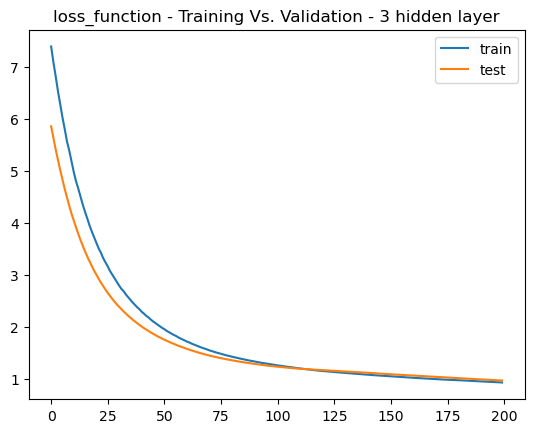

In [52]:
import matplotlib.pyplot as plt

# Train vs test for shallow net
plt.plot(fit_model.history["loss"])
plt.plot(fit_model.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 3 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [53]:
from sklearn.metrics import accuracy_score


In [54]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.6695 - mse: 0.6695 - 30ms/epoch - 15ms/step
Loss: 0.6694664359092712, Accuracy: 0.6694664359092712


In [55]:
# import tensorflow to save the model
import tensorflow as tf

In [56]:
# Save model in JSON format
nn_json = nn.to_json()

# Define a relative path to save the model
# The model should be saved with a .json file extension
file_path = (r"C:\Users\juddm\JupyterLab-Workspace\Project 2\model2.json")

# Write the model to the the file 
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Define a relative path to save the model weights
# The model weights should be saved with a .h5 file extension
file_path = (r"C:\Users\juddm\JupyterLab-Workspace\Project 2\model2.h5")

nn.save_weights(file_path)

In [57]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

In [58]:
# Load the model to predict values

# Identify the relative path of the model's location
file_path = Path(r"C:\Users\juddm\JupyterLab-Workspace\Project 2\model2.json")

# Read in the model and save it as the variable loaded_model
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Identify the relative path for the model's weights
file_path = Path(r"C:\Users\juddm\JupyterLab-Workspace\Project 2\model2.h5")

# Load the model's weights to the variable loaded_model
loaded_model.load_weights(file_path)

In [59]:
 # Predict values using the testing data
y_pred = loaded_model.predict(X_test)

# View the model's predictions
y_pred[:5, :]

2/2 [==============================] - 0s 16ms/step


array([[ 0.79250973],
       [ 0.11945432],
       [ 0.13453555],
       [-0.07161123],
       [ 0.36003357]], dtype=float32)

In [61]:
# Import
from sklearn.metrics import mean_squared_error

# Evaluate the model with the MSE metric
print(mean_squared_error(y_test, y_pred))

0.6694664034002319


In [62]:
# Import
from sklearn.metrics import mean_absolute_error

# Evaluate the model with the MAE metric
print(mean_absolute_error(y_test, y_pred))

0.5232152597452708
